###BUS 241A: Machine Learning
###Final Group Project
###Ray & Obaidullah



Dataset Name: Student Depression Dataset\
Source: Kaggle\
https://www.kaggle.com/datasets/hopesb/student-depression-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Fall 2024/BUS 241A: Machine Learning/Final Project/Student Depression Dataset.csv')
df.head()

cnt = df.count
print (cnt)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<bound method DataFrame.count of            id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   


### Part 1: Decision & Regression Tree

##I. Consultancy: mental health assessment

Target variable: depression. Using this model to predict whether a student has depression.

Convert "sleep duration" into a numeric variable (kind of like natural language processing but quite simple)

In [ ]:
for duration in df['Sleep Duration']:
  def avg_sleep_time(duration):
    if duration == '5-6 hours':
      return 5.5
    elif duration == '6-7 hours':
      return 6.5
    elif duration == '7-8 hours':
      return 7.5
    elif duration == 'Less than 5 hours':
      return 5
    elif duration == 'More than 8 hours':
      return 8

df["Avg Sleep Duration"] = df["Sleep Duration"].apply(avg_sleep_time)
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Avg Sleep Duration
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,5.5
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,5.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,7.5
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,5.5


In [ ]:
#drop the oberservations that are not students (some of them are engineers)
df = df[df['Profession'] == 'Student']


#rename some of the complicated column names
df = df.rename(columns={"Have you ever had suicidal thoughts ?": "Suicidal Thoughts"})
df = df.rename(columns = {'Family History of Mental Illness': 'Family History'})

#Convert non-numeric values to numeric
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy':1, 'Moderate':2, 'Healthy':3})
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].map({'Yes':1, 'No':0})
df['Family History'] = df['Family History'].map({'Yes':1, 'No':0})
df["Gender"] = df["Gender"].map({'Male':1, 'Female':0})

#keep the variables we need, we removed city and degree bc it's too complicated to handle (too many categories)
df = df[['Gender','Age','CGPA', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Suicidal Thoughts', 'Work/Study Hours', "Family History", "Avg Sleep Duration", 'Depression','Financial Stress']]
df.head()

#drop null values
df = df.dropna()
#target variable
y = df['Depression']
#feature variables
x = df.drop('Depression',axis=1)
print(x.head())
print(x.shape)


   Gender   Age  CGPA  Academic Pressure  Study Satisfaction  Dietary Habits  \
0       1  33.0  8.97                5.0                 2.0             3.0   
1       0  24.0  5.90                2.0                 5.0             2.0   
2       1  31.0  7.03                3.0                 5.0             3.0   
3       0  28.0  5.59                3.0                 2.0             2.0   
4       0  25.0  8.13                4.0                 3.0             2.0   

   Suicidal Thoughts  Work/Study Hours  Family History  Avg Sleep Duration  \
0                  1               3.0               0                 5.5   
1                  0               3.0               1                 5.5   
2                  0               9.0               1                 5.0   
3                  1               4.0               1                 7.5   
4                  1               1.0               0                 5.5   

   Financial Stress  
0               1.0  
1     

In [ ]:
#get the tools ready
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit


Let's first try a sweep search (1 through 20) to find the best depth for the tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': range(1, 21)  # Test depths from 1 to 20
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


best_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Optimal depth for the decision tree: {best_depth}")
print(f"Test set accuracy with optimal depth: {test_accuracy:.4f}")

Optimal depth for the decision tree: 7
Test set accuracy with optimal depth: 0.8282


cross validation for the tree, with the optimal tree depth

In [ ]:
nmc = 250
treemodel = tree.DecisionTreeClassifier(max_depth=7)

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(treemodel, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.8460776931551468
0.830866091954023


In [ ]:
#a monte-carlo for the tree
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

scoreVec = np.zeros(1000)
for i in range(1000):
    treemodel = tree.DecisionTreeClassifier(max_depth=7,random_state=i)
    treemodel.fit(x_train,y_train)
    scoreVec[i] = treemodel.score(x_test,y_test)
print("min/max")
print(np.max(scoreVec))
print(np.min(scoreVec))

min/max
0.8281609195402299
0.8281609195402299


Logistic Regression:

In [ ]:
nmc = 250
lr = LogisticRegression(penalty=None,max_iter=1000,solver='lbfgs')
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
lr.fit(x,y)
CVInfo = cross_validate(lr, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.8471173061263592
0.847021264367816


Let's make a confusion matrix and get the error rate

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
treemodel = tree.DecisionTreeClassifier(max_depth=7)
treemodel.fit(x_train,y_train)

y_predict = treemodel.predict(x_test)

cmat = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted No Depression', 'Predicted Depression'],
    index=['True No Depression', 'True Depression']
)

print(cmat)

#type i and type ii error rate
TP, FP, FN, TN = cmat.values.ravel()


FPR = FP / (FP + TN)

FNR = FN / (FN + TP)

print("Type I Error Rate:", FPR)
print("Type II Error Rate:", FNR)




                    Predicted No Depression  Predicted Depression
True No Depression                     2265                   632
True Depression                         521                  3542
Type I Error Rate: 0.15141351221849544
Type II Error Rate: 0.1870064608758076


Let's take a look at feature importance

Gender: 0.000
Age: 0.035
CGPA: 0.000
Academic Pressure: 0.248
Study Satisfaction: 0.001
Dietary Habits: 0.015
Suicidal Thoughts: 0.603
Work/Study Hours: 0.004
Family History: 0.000
Avg Sleep Duration: 0.000
Financial Stress: 0.094


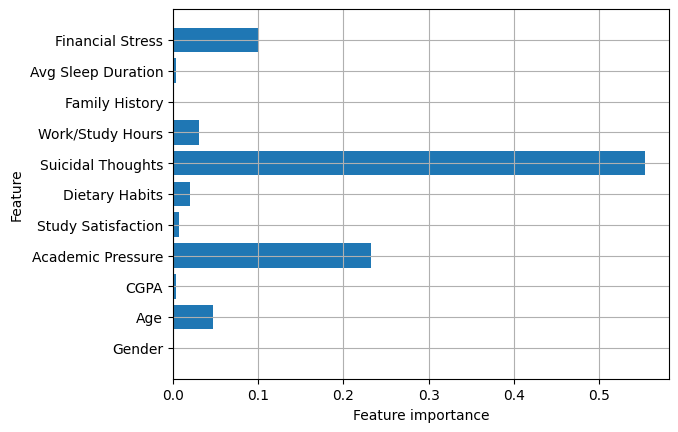

In [ ]:
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treemodel)
plt.grid()
#print the feature importance of every variable
treemodel = tree.DecisionTreeClassifier(max_depth=5)
treemodel.fit(x_train,y_train)
feature_importances = treemodel.feature_importances_
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Try the process again w/o the variables that has zero feature importance

In [ ]:
#we keep the variables based on the results above
df = df[['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Suicidal Thoughts', 'Work/Study Hours', 'Depression','Financial Stress']]
df.head()

df = df.dropna()
y = df['Depression']
x = df.drop('Depression',axis=1)
print(x.head())
print(x.shape)



    Age  Academic Pressure  Study Satisfaction  Dietary Habits  \
0  33.0                5.0                 2.0             3.0   
1  24.0                2.0                 5.0             2.0   
2  31.0                3.0                 5.0             3.0   
3  28.0                3.0                 2.0             2.0   
4  25.0                4.0                 3.0             2.0   

   Suicidal Thoughts  Work/Study Hours  Financial Stress  
0                  1               3.0               1.0  
1                  0               3.0               2.0  
2                  0               9.0               1.0  
3                  1               4.0               5.0  
4                  1               1.0               1.0  
(27837, 7)


Find the optimal tree depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': range(1, 21)  # Test depths from 1 to 20
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


best_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Optimal depth for the decision tree: {best_depth}")
print(f"Test set score with optimal depth: {test_accuracy:.4f}")

Optimal depth for the decision tree: 8
Test set score with optimal depth: 0.8362


In [ ]:
#cross validate again
nmc = 250
treemodel = tree.DecisionTreeClassifier(max_depth=8)

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(treemodel, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.8524858935670834
0.8329005747126437


In [ ]:
#monte-carlo test again
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

scoreVec = np.zeros(1000)
for i in range(1000):
    treemodel = tree.DecisionTreeClassifier(max_depth=8,random_state=i)
    treemodel.fit(x_train,y_train)
    scoreVec[i] = treemodel.score(x_test,y_test)
print("min/max")
print(np.max(scoreVec))
print(np.min(scoreVec))

min/max
0.8362068965517241
0.8362068965517241


In [ ]:
#logistic regression
nmc = 250
lr = LogisticRegression(penalty=None,max_iter=1000,solver='lbfgs')
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
lr.fit(x,y)
CVInfo = cross_validate(lr, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.8461552905110887
0.8459385057471265


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
treemodel = tree.DecisionTreeClassifier(max_depth=7)
treemodel.fit(x_train,y_train)

y_predict = treemodel.predict(x_test)

cmat = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted No Depression', 'Predicted Depression'],
    index=['True No Depression', 'True Depression']
)

print(cmat)

TP, FP, FN, TN = cmat.values.ravel()


FPR = FP / (FP + TN)

FNR = FN / (FN + TP)

print("Type I Error Rate:", FPR)
print("Type II Error Rate:", FNR)

                    Predicted No Depression  Predicted Depression
True No Depression                     2307                   602
True Depression                         524                  3527
Type I Error Rate: 0.14579801404698475
Type II Error Rate: 0.18509360649947015


Age: 0.044
Academic Pressure: 0.247
Study Satisfaction: 0.005
Dietary Habits: 0.006
Suicidal Thoughts: 0.597
Work/Study Hours: 0.003
Financial Stress: 0.098


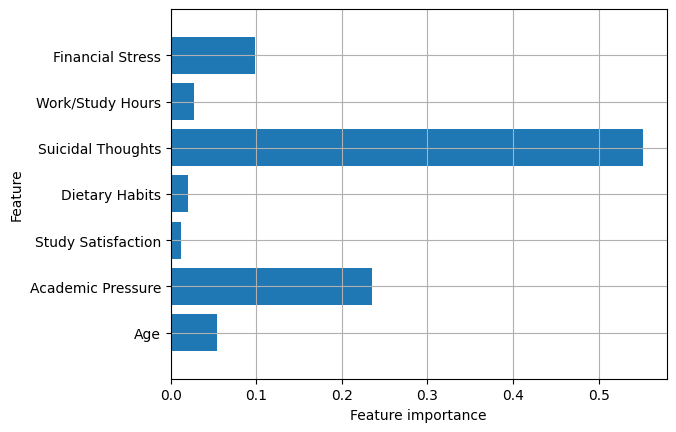

In [ ]:
#feature importance again
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treemodel)
plt.grid()
#print the feature importance of every variable
treemodel = tree.DecisionTreeClassifier(max_depth=5)
treemodel.fit(x_train,y_train)
feature_importances = treemodel.feature_importances_
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Last but not least, a sensitivity test that removes suicidal thoughts

In [ ]:

x = x.drop("Suicidal Thoughts",axis=1)
nmc = 250
trainScores = np.zeros(nmc)
testScores  = np.zeros(nmc)
treemodel = tree.DecisionTreeClassifier(max_depth=8)

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(treemodel, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.8033949322220626
0.7835327586206897


The performance does get apparently worse with "suicidal thoughts" removed

##II. Consultancy: suicide prevention
Target variable: suicidal thoughts
Using the model to predict whether a person have suicidal thoughs, aiming to monitor and prevent suicide and self-harm

In [ ]:
#reload the database to give a fresh start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Fall 2024/BUS 241A: Machine Learning/Final Project/Student Depression Dataset.csv')
df.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
#the same processing again
for duration in df['Sleep Duration']:
  def avg_sleep_time(duration):
    if duration == '5-6 hours':
      return 5.5
    elif duration == '6-7 hours':
      return 6.5
    elif duration == '7-8 hours':
      return 7.5
    elif duration == 'Less than 5 hours':
      return 5
    elif duration == 'More than 8 hours':
      return 8

df["Avg Sleep Duration"] = df["Sleep Duration"].apply(avg_sleep_time)
df.head()

df = df[df['Profession'] == 'Student']


#rename some of the complicated column names
df = df.rename(columns={"Have you ever had suicidal thoughts ?": "Suicidal Thoughts"})
df = df.rename(columns = {'Family History of Mental Illness': 'Family History'})

#Convert non-numeric values to numeric
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy':1, 'Moderate':2, 'Healthy':3})
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].map({'Yes':1, 'No':0})
df['Family History'] = df['Family History'].map({'Yes':1, 'No':0})
df["Gender"] = df["Gender"].map({'Male':1, 'Female':0})

#keep the variables we need, we removed city and degree bc it's too complicated to handle (too many categories)
df = df[['Gender','Age','CGPA', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Suicidal Thoughts', 'Work/Study Hours', "Family History", "Avg Sleep Duration", 'Depression','Financial Stress']]
df.head()

#drop null values
df = df.dropna()



Redefine the target and feature variables

In [ ]:
df = df[['Gender','Age','CGPA', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 'Suicidal Thoughts', 'Work/Study Hours', "Family History", "Avg Sleep Duration", 'Depression','Financial Stress']]
df.head()

#drop null values
df = df.dropna()
#target variable
y = df['Suicidal Thoughts']
#feature variables
x = df.drop('Suicidal Thoughts',axis=1)
print(x.head())
print(x.shape)


   Gender   Age  CGPA  Academic Pressure  Study Satisfaction  Dietary Habits  \
0       1  33.0  8.97                5.0                 2.0             3.0   
1       0  24.0  5.90                2.0                 5.0             2.0   
2       1  31.0  7.03                3.0                 5.0             3.0   
3       0  28.0  5.59                3.0                 2.0             2.0   
4       0  25.0  8.13                4.0                 3.0             2.0   

   Work/Study Hours  Family History  Avg Sleep Duration  Depression  \
0               3.0               0                 5.5           1   
1               3.0               1                 5.5           0   
2               9.0               1                 5.0           0   
3               4.0               1                 7.5           1   
4               1.0               0                 5.5           0   

   Financial Stress  
0               1.0  
1               2.0  
2               1.0  
3   

In [ ]:
#find the optimal tree depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': range(1, 21)  # Test depths from 1 to 20
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


best_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Optimal depth for the decision tree: {best_depth}")
print(f"Test set accuracy with optimal depth: {test_accuracy:.4f}")

Optimal depth for the decision tree: 4
Test set accuracy with optimal depth: 0.7782


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
#cross validate
nmc = 250
treemodel = tree.DecisionTreeClassifier(max_depth=4)

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(treemodel, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.7828676533984767
0.7817948275862068


In [ ]:
#monte-carlo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

scoreVec = np.zeros(1000)
for i in range(1000):
    treemodel = tree.DecisionTreeClassifier(max_depth=8,random_state=i)
    treemodel.fit(x_train,y_train)
    scoreVec[i] = treemodel.score(x_test,y_test)
print("min/max")
print(np.max(scoreVec))
print(np.min(scoreVec))

min/max
0.7725574712643678
0.7704022988505748


In [ ]:
#logistic regression
nmc = 250
lr = LogisticRegression(penalty=None,max_iter=1000,solver='lbfgs')
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
lr.fit(x,y)
CVInfo = cross_validate(lr, x, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.7821763663361594
0.7824000000000001


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
treemodel = tree.DecisionTreeClassifier(max_depth=4)
treemodel.fit(x_train,y_train)

y_predict = treemodel.predict(x_test)

cmat = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted No Suicidal Thoughts', 'Predicted Suicidal Thoughts'],
    index=['True No Suicidal Thoughts', 'True Suicidal Thoughts']
)

print(cmat)

TP, FP, FN, TN = cmat.values.ravel()


FPR = FP / (FP + TN)

FNR = FN / (FN + TP)

print("Type I Error Rate:", FPR)
print("Type II Error Rate:", FNR)

                           Predicted No Suicidal Thoughts  \
True No Suicidal Thoughts                            1914   
True Suicidal Thoughts                                920   

                           Predicted Suicidal Thoughts  
True No Suicidal Thoughts                          602  
True Suicidal Thoughts                            3524  
Type I Error Rate: 0.14590402326708676
Type II Error Rate: 0.32462949894142556


Gender: 0.000
Age: 0.004
CGPA: 0.005
Academic Pressure: 0.000
Study Satisfaction: 0.000
Dietary Habits: 0.001
Work/Study Hours: 0.002
Family History: 0.000
Avg Sleep Duration: 0.002
Depression: 0.984
Financial Stress: 0.001


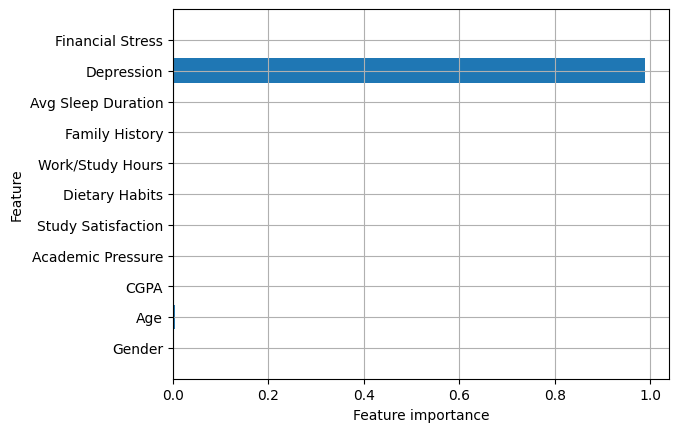

In [ ]:
#feature importance again
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treemodel)
plt.grid()
#print the feature importance of every variable
treemodel = tree.DecisionTreeClassifier(max_depth=5)
treemodel.fit(x_train,y_train)
feature_importances = treemodel.feature_importances_
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

### Part 2: Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure all columns are numeric
# Drop rows with missing values if any
df = df.dropna()

# Select features and target variable
X = df.drop(columns=['Depression'])  # Features
y = df['Depression']                # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.11755391741218062
R-squared: 0.5168798816833846
